## Keras -- MLPs on MNIST

In [14]:
# if keras is not using tensorflow as backend set "KERAS_BACKEND=tensorflow" use this command
import tensorflow as tf
from tensorflow.keras import utils
from tensorflow.keras.datasets import mnist 
import seaborn as sns
from tensorflow.keras.initializers import RandomNormal

In [15]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import time
# https://gist.github.com/greydanus/f6eee59eaf1d90fcb3b534a25362cea4
# https://stackoverflow.com/a/14434334
# this function is used to update the plots for each epoch and error
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

In [16]:
# the data, shuffled and split between train and test sets 
from sklearn.model_selection import train_test_split

(train_x, train_y), (X_test, y_test) = mnist.load_data()
X_train, X_cv, y_train, y_cv = train_test_split(train_x, train_y, stratify=train_y, test_size=0.2)

In [17]:
print(X_train.shape)
print(y_train.shape)
print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d, %d)"%(X_train.shape[1], X_train.shape[2]))
print("Number of cross validation examples :", X_cv.shape[0], "and each image is of shape (%d, %d)"%(X_cv.shape[1], X_cv.shape[2]))
print("Number of testing examples :", X_test.shape[0], "and each image is of shape (%d, %d)"%(X_test.shape[1], X_test.shape[2]))

(48000, 28, 28)
(48000,)
Number of training examples : 48000 and each image is of shape (28, 28)
Number of cross validation examples : 12000 and each image is of shape (28, 28)
Number of testing examples : 10000 and each image is of shape (28, 28)


<IPython.core.display.Javascript object>


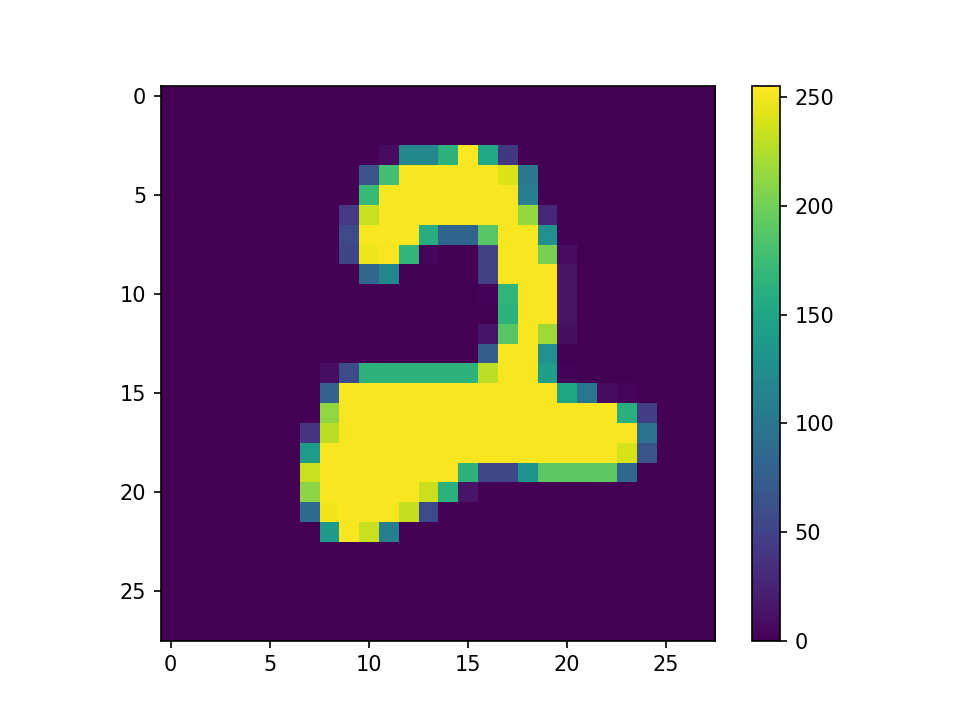

In [18]:
plt.figure()
plt.imshow(X_train[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [19]:
# Note that the input shape is a 2 dimensional vector
# for each image we have a (28*28) vector
# we will convert the (28*28) vector into single dimensional vector of 1 * 784 

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2])
X_cv = X_cv.reshape(X_cv.shape[0], X_cv.shape[1]*X_cv.shape[2])
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2]) 

In [20]:
# after converting the input images from 3d to 2d vectors

print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d)"%(X_train.shape[1]))
print("Number of cross validation examples :", X_cv.shape[0], "and each image is of shape (%d)"%(X_train.shape[1]))
print("Number of testing examples :", X_test.shape[0], "and each image is of shape (%d)"%(X_test.shape[1]))

Number of training examples : 48000 and each image is of shape (784)
Number of cross validation examples : 12000 and each image is of shape (784)
Number of testing examples : 10000 and each image is of shape (784)


In [11]:
# An example data point
print(X_train[0])

# 0 - white ; 255 - black

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0 191 255 255 255 128  64   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0 191 255 255 255 255
 255 191 128   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0 255 255 255 128 191 255 255 255  64   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 128  64   0
   0   0  64 255 255 255   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0 128 255 255   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0 128 255 255 128   0   0   0   

In [21]:
# if we observe the above matrix each cell is having a value between 0-255
# before we move to apply machine learning algorithms lets try to normalize the data
# X => (X - Xmin)/(Xmax-Xmin) = X/255

X_train = X_train/255
X_cv = X_cv/255
X_test = X_test/255

In [37]:
# example data point after normlizing
print(X_train[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [22]:
# here we are having a class number for each image
print("Class label of first image :", y_train[0])

# lets convert this into a 10 dimensional vector
# ex: consider an image is 5 convert it into 5 => [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
# this conversion needed for MLPs 

Y_train = utils.to_categorical(y_train, 10) 
Y_cv = utils.to_categorical(y_cv, 10)
Y_test = utils.to_categorical(y_test, 10)

print("After converting the output into a vector : ",Y_train[0])

Class label of first image : 2
After converting the output into a vector :  [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


In [50]:
print(X_train.shape)
print(Y_train.shape)
print(X_cv.shape)
print(Y_cv.shape)
print(X_test.shape)
print(Y_test.shape)

(48000, 784)
(48000, 10)
(12000, 784)
(12000, 10)
(10000, 784)
(10000, 10)


<h2>  Softmax classifier  </h2>

In [9]:
# https://keras.io/getting-started/sequential-model-guide/

# The Sequential model is a linear stack of layers.
# We can create a Sequential model by passing a list of layer instances to the constructor:

# model = Sequential([
#     Dense(32, input_shape=(784,)),
#     Activation('relu'),
#     Dense(10),
#     Activation('softmax'),
# ])

# We can also simply add layers via the .add() method:

# model = Sequential()
# model.add(Dense(32, input_dim=784))
# model.add(Activation('relu'))

###

# https://keras.io/layers/core/

# keras.layers.Dense(units, activation=None, use_bias=True, kernel_initializer='glorot_uniform', 
# bias_initializer='zeros', kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None, 
# kernel_constraint=None, bias_constraint=None)

# Dense implements the operation: output = activation(dot(input, kernel) + bias) where
# activation is the element-wise activation function passed as the activation argument, 
# kernel is a weights matrix created by the layer, and 
# bias is a bias vector created by the layer (only applicable if use_bias is True).

# output = activation(dot(input, kernel) + bias)  => y = activation(WT. X + b)
# That means input ---> softmax {One layer in between which is Dense connection }
####

# https://keras.io/activations/

# Activations can either be used through an Activation layer, or through the activation argument supported by all forward layers:

# from keras.layers import Activation, Dense

# model.add(Dense(64))
# model.add(Activation('tanh'))

# This is equivalent to:
# model.add(Dense(64, activation='tanh'))

# there are many activation functions ar available ex: tanh, relu, softmax

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Activation 


In [29]:
# some model parameters

output_dim = 10
input_dim = X_train.shape[1]

batch_size = 128 
nb_epoch = 20

In [11]:
# start building a model
model = keras.Sequential()

# The model needs to know what input shape it should expect. 
# For this reason, the first layer in a Sequential model 
# (and only the first, because following layers can do automatic shape inference)
# needs to receive information about its input shape. 
# We can use input_shape and input_dim to pass the shape of input

# output_dim represent the number of nodes need in that layer
# here we have 10 nodes

model.add(Dense(output_dim, input_dim=input_dim, activation='softmax'))

In [51]:
# Before training a model, you need to configure the learning process, which is done via the compile method

# It receives three arguments:
# An optimizer. This could be the string identifier of an existing optimizer , https://keras.io/optimizers/
# A loss function. This is the objective that the model will try to minimize., https://keras.io/losses/
# A list of metrics. For any classification problem we want to set this to metrics=['accuracy'].  https://keras.io/metrics/


# Note: when using the categorical_crossentropy loss, our targets should be in categorical format 
# (e.g. if you have 10 classes, the target for each sample should be a 10-dimensional vector that is all-zeros except 
# for a 1 at the index corresponding to the class of the sample).

# that is why we converted the labels into vectors

model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

# Keras models are trained on Numpy arrays of input data and labels. 
# For training a model, we will typically use the  fit function

# fit(self, x=None, y=None, batch_size=None, epochs=1, verbose=1, callbacks=None, validation_split=0.0, 
# validation_data=None, shuffle=True, class_weight=None, sample_weight=None, initial_epoch=0, steps_per_epoch=None, 
# validation_steps=None)

# fit() function Trains the model for a fixed number of epochs (iterations on a dataset).

# it returns A History object. Its History.history attribute is a record of training loss values and 
# metrics values at successive epochs, as well as validation loss values and validation metrics values (if applicable).

# https://github.com/openai/baselines/issues/20

history = model.fit(X_train, Y_train, steps_per_epoch=500, epochs=nb_epoch, verbose=1, validation_data=(X_cv, Y_cv)) 


Epoch 1/20
500/500 [==============================] - 2s 4ms/step - loss: 0.5697 - accuracy: 0.8633 - val_loss: 0.5472 - val_accuracy: 0.8658
Epoch 2/20
500/500 [==============================] - 1s 3ms/step - loss: 0.5108 - accuracy: 0.8716 - val_loss: 0.5036 - val_accuracy: 0.8728
Epoch 3/20
500/500 [==============================] - 2s 3ms/step - loss: 0.4750 - accuracy: 0.8781 - val_loss: 0.4749 - val_accuracy: 0.8780
Epoch 4/20
500/500 [==============================] - 1s 3ms/step - loss: 0.4504 - accuracy: 0.8823 - val_loss: 0.4543 - val_accuracy: 0.8819
Epoch 5/20
500/500 [==============================] - 1s 3ms/step - loss: 0.4320 - accuracy: 0.8857 - val_loss: 0.4389 - val_accuracy: 0.8851
Epoch 6/20
500/500 [==============================] - 1s 3ms/step - loss: 0.4177 - accuracy: 0.8884 - val_loss: 0.4265 - val_accuracy: 0.8875
Epoch 7/20
500/500 [==============================] - 1s 3ms/step - loss: 0.4062 - accuracy: 0.8906 - val_loss: 0.4165 - val_accuracy: 0.8897
Epoch 

Test score: 0.3276126980781555
Test accuracy: 0.9110000133514404


<IPython.core.display.Javascript object>


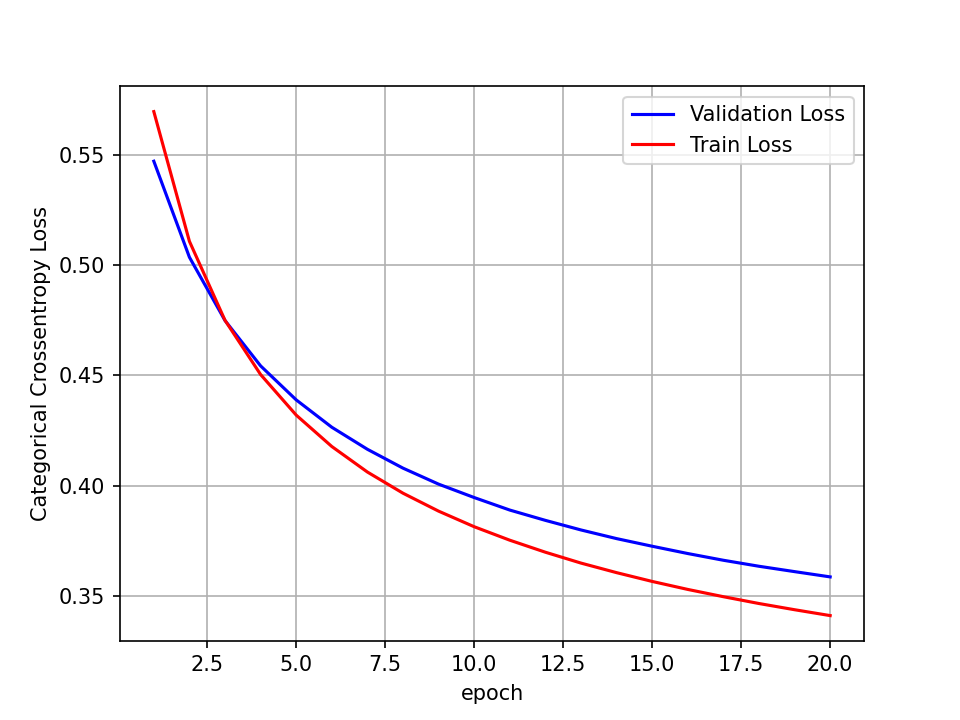

In [52]:
score = model.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

#OR
# test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

 <h3>  MLP + Sigmoid activation + SGDOptimizer </h3>

In [54]:
# Multilayer perceptron

model_sigmoid = Sequential()
model_sigmoid.add(Dense(512, activation='sigmoid', input_shape=(input_dim,)))  # Layer 1
model_sigmoid.add(Dense(128, activation='sigmoid'))  # Layer 2
model_sigmoid.add(Dense(output_dim, activation='softmax'))  # Output layer

model_sigmoid.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 512)               401920    
                                                                 
 dense_2 (Dense)             (None, 128)               65664     
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 468,874
Trainable params: 468,874
Non-trainable params: 0
_________________________________________________________________


In [55]:
model_sigmoid.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_sigmoid.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_cv, Y_cv))

Epoch 1/20
375/375 [==============================] - 3s 7ms/step - loss: 2.2719 - accuracy: 0.2041 - val_loss: 2.2385 - val_accuracy: 0.3427
Epoch 2/20
375/375 [==============================] - 2s 6ms/step - loss: 2.2021 - accuracy: 0.3897 - val_loss: 2.1643 - val_accuracy: 0.4484
Epoch 3/20
375/375 [==============================] - 2s 6ms/step - loss: 2.1180 - accuracy: 0.5135 - val_loss: 2.0684 - val_accuracy: 0.5608
Epoch 4/20
375/375 [==============================] - 2s 6ms/step - loss: 2.0059 - accuracy: 0.5904 - val_loss: 1.9404 - val_accuracy: 0.6089
Epoch 5/20
375/375 [==============================] - 2s 6ms/step - loss: 1.8583 - accuracy: 0.6334 - val_loss: 1.7752 - val_accuracy: 0.6663
Epoch 6/20
375/375 [==============================] - 2s 6ms/step - loss: 1.6787 - accuracy: 0.6779 - val_loss: 1.5871 - val_accuracy: 0.6790
Epoch 7/20
375/375 [==============================] - 2s 6ms/step - loss: 1.4868 - accuracy: 0.7094 - val_loss: 1.3994 - val_accuracy: 0.7366
Epoch 

Test score: 0.5280013680458069
Test accuracy: 0.866599977016449


<IPython.core.display.Javascript object>


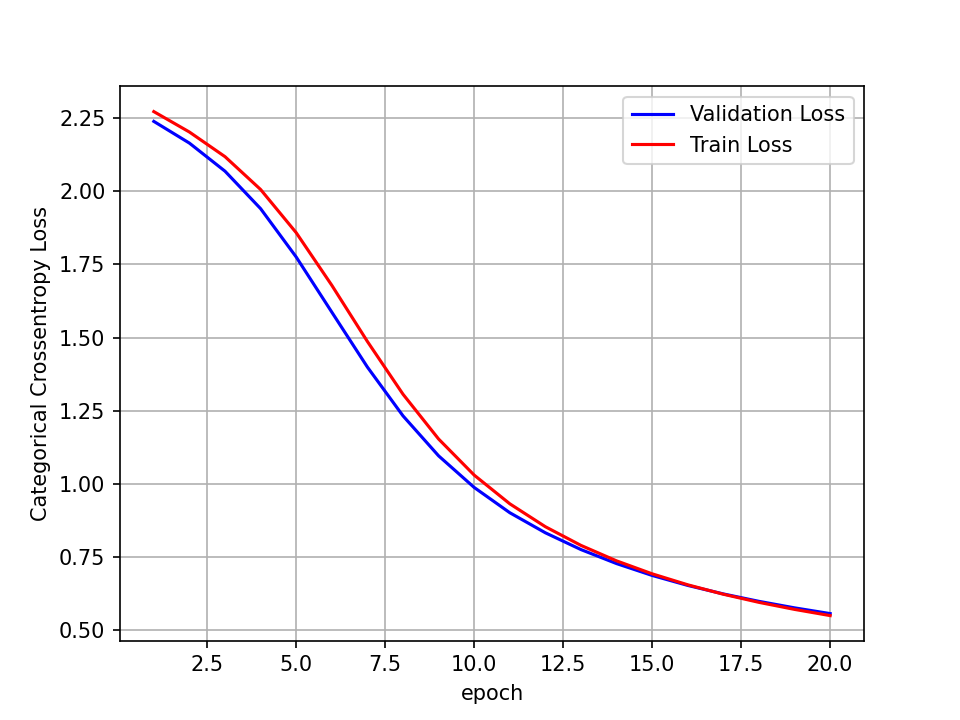

In [56]:
score = model_sigmoid.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

In [58]:
w_after = model_sigmoid.get_weights()

print(len(w_after))

6


<IPython.core.display.Javascript object>


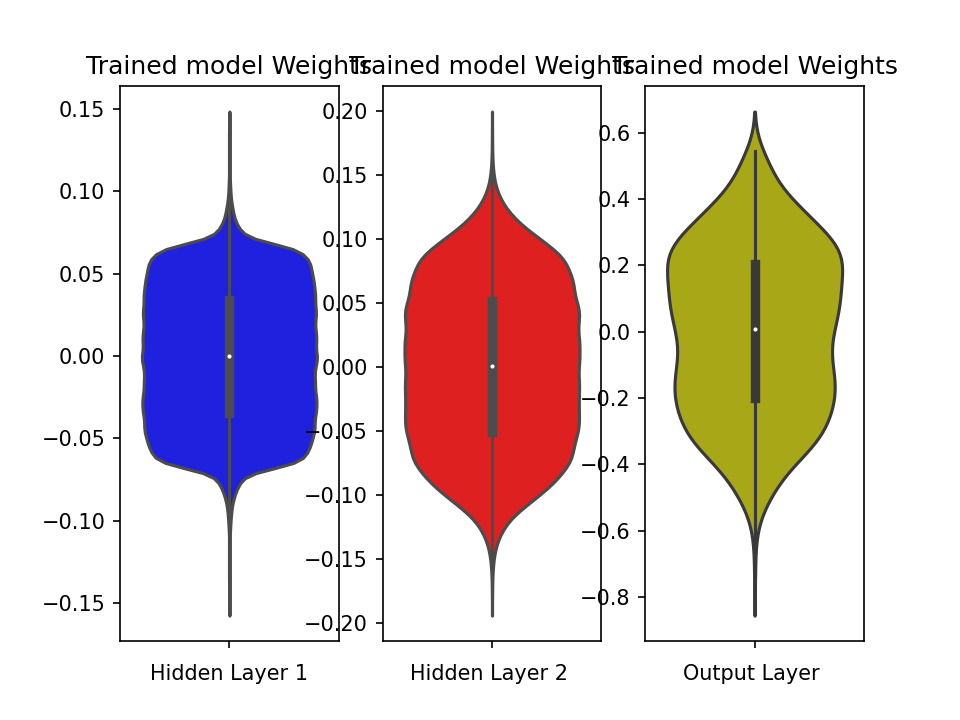

In [57]:
w_after = model_sigmoid.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<h2>MLP + Sigmoid activation + ADAM </h2>

In [12]:
model_sigmoid = Sequential()
model_sigmoid.add(Dense(512, activation='sigmoid', input_shape=(input_dim,)))
model_sigmoid.add(Dense(128, activation='sigmoid'))
model_sigmoid.add(Dense(output_dim, activation='softmax'))

model_sigmoid.summary()

model_sigmoid.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_sigmoid.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_cv, Y_cv))

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 512)               401920    
                                                                 
 dense_2 (Dense)             (None, 128)               65664     
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 468,874
Trainable params: 468,874
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
375/375 [==============================] - 5s 9ms/step - loss: 0.4782 - accuracy: 0.8820 - val_loss: 0.3017 - val_accuracy: 0.9149
Epoch 2/20
375/375 [==============================] - 3s 8ms/step - loss: 0.2582 - accuracy: 0.9279 - val_loss: 0.2524 - val_accuracy: 0.9251
Epoch 3/20
375/375 [========

Test score: 0.1398448497056961
Test accuracy: 0.9584000110626221


<IPython.core.display.Javascript object>


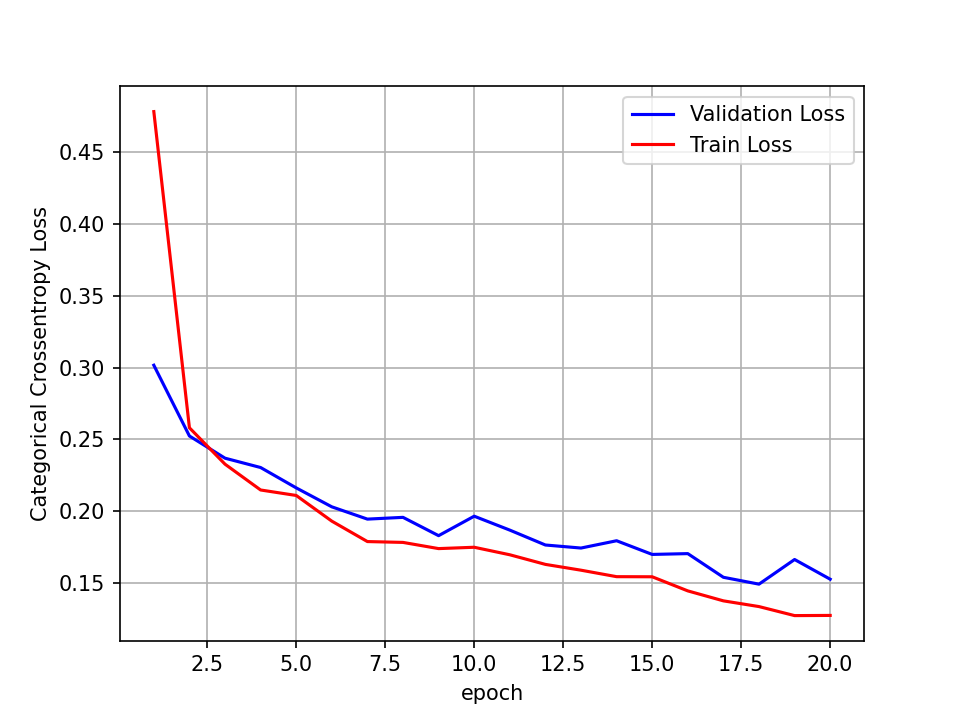

In [13]:
score = model_sigmoid.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<IPython.core.display.Javascript object>


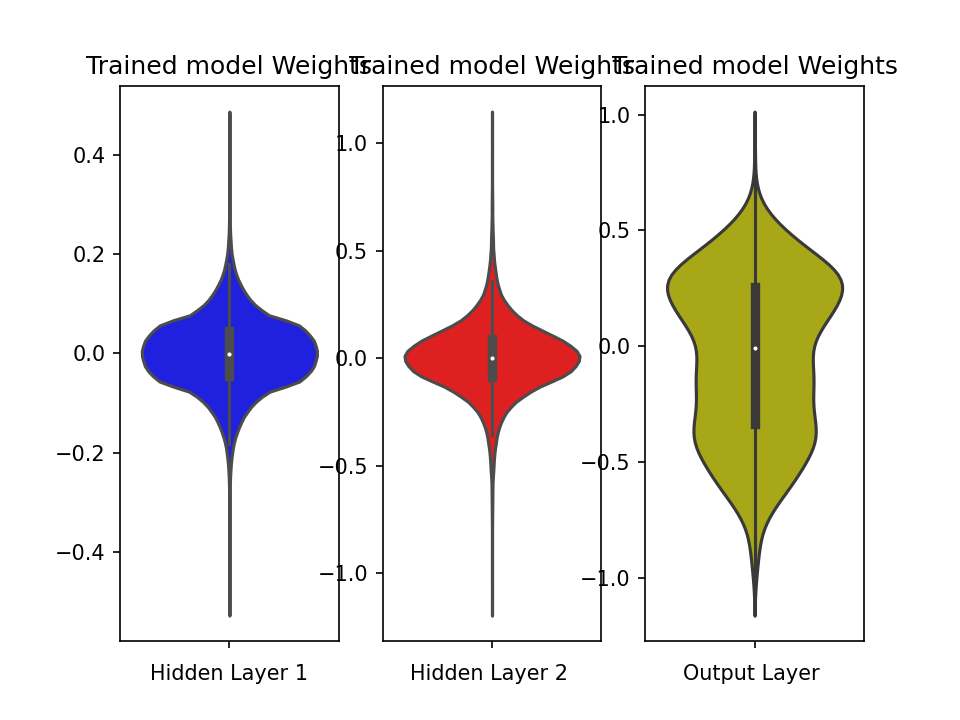

In [14]:
w_after = model_sigmoid.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<h2> MLP + ReLU +SGD </h2>

In [15]:
# https://arxiv.org/pdf/1707.09725.pdf#page=95
# for relu layers
# If we sample weights from a normal distribution N(0,σ) we satisfy this condition with σ=√(2/(ni). 
# h1 =>  σ=√(2/(fan_in) = 0.062  => N(0,σ) = N(0,0.062)
# h2 =>  σ=√(2/(fan_in)  = 0.125  => N(0,σ) = N(0,0.125)
# out =>  σ=√(2/(fan_in+1) = 0.120  => N(0,σ) = N(0,0.120)

model_relu = Sequential()
model_relu.add(Dense(512, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
model_relu.add(Dense(128, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
# We can change the initializers. Just change the above code, kernel initializer part. 
# https://keras.io/api/layers/initializers/
model_relu.add(Dense(output_dim, activation='softmax'))


model_relu.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 512)               401920    
                                                                 
 dense_5 (Dense)             (None, 128)               65664     
                                                                 
 dense_6 (Dense)             (None, 10)                1290      
                                                                 
Total params: 468,874
Trainable params: 468,874
Non-trainable params: 0
_________________________________________________________________


In [16]:
model_relu.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_cv, Y_cv))

Epoch 1/20
375/375 [==============================] - 4s 9ms/step - loss: nan - accuracy: 0.0989 - val_loss: nan - val_accuracy: 0.0988
Epoch 2/20
375/375 [==============================] - 3s 7ms/step - loss: nan - accuracy: 0.0987 - val_loss: nan - val_accuracy: 0.0988
Epoch 3/20
375/375 [==============================] - 3s 8ms/step - loss: nan - accuracy: 0.0987 - val_loss: nan - val_accuracy: 0.0988
Epoch 4/20
375/375 [==============================] - 3s 7ms/step - loss: nan - accuracy: 0.0987 - val_loss: nan - val_accuracy: 0.0988
Epoch 5/20
375/375 [==============================] - 2s 7ms/step - loss: nan - accuracy: 0.0987 - val_loss: nan - val_accuracy: 0.0988
Epoch 6/20
375/375 [==============================] - 2s 7ms/step - loss: nan - accuracy: 0.0987 - val_loss: nan - val_accuracy: 0.0988
Epoch 7/20
375/375 [==============================] - 2s 7ms/step - loss: nan - accuracy: 0.0987 - val_loss: nan - val_accuracy: 0.0988
Epoch 8/20
375/375 [============================

Test score: 0.19273753464221954
Test accuracy: 0.9634000062942505


<IPython.core.display.Javascript object>


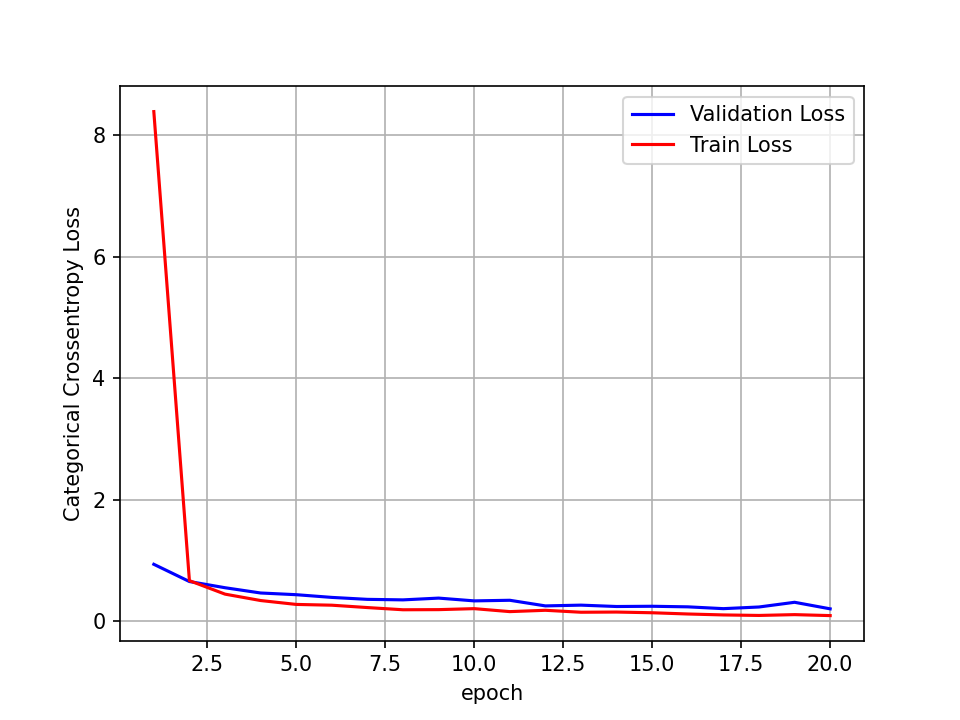

In [18]:
score = model_relu.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<IPython.core.display.Javascript object>


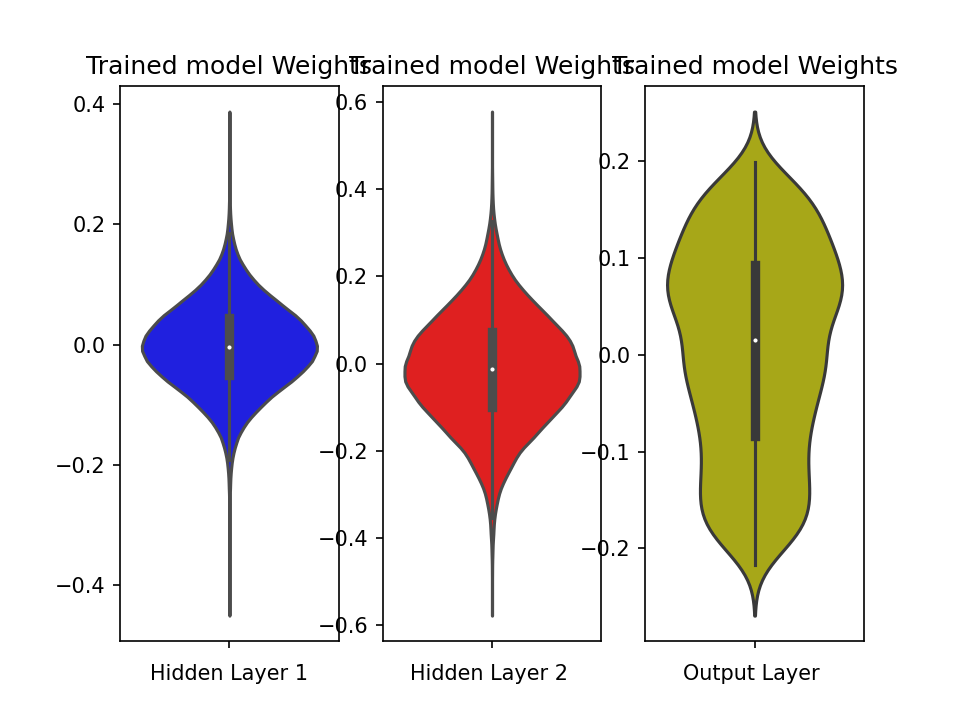

In [19]:
w_after = model_relu.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<h2> MLP + ReLU + ADAM </h2>

In [17]:
model_relu = Sequential()
model_relu.add(Dense(512, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
model_relu.add(Dense(128, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
model_relu.add(Dense(output_dim, activation='softmax'))

print(model_relu.summary())

model_relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_cv, Y_cv))

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 512)               401920    
                                                                 
 dense_8 (Dense)             (None, 128)               65664     
                                                                 
 dense_9 (Dense)             (None, 10)                1290      
                                                                 
Total params: 468,874
Trainable params: 468,874
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/20
375/375 [==============================] - 4s 10ms/step - loss: 8.3855 - accuracy: 0.7834 - val_loss: 0.9405 - val_accuracy: 0.7907
Epoch 2/20
375/375 [==============================] - 3s 8ms/step - loss: 0.6713 - accuracy: 0.8469 - val_loss: 0.6569 - val_accuracy: 0.8543
Epoch 3/20
375/375 [==

Test score: 0.19273753464221954
Test accuracy: 0.9634000062942505


<IPython.core.display.Javascript object>


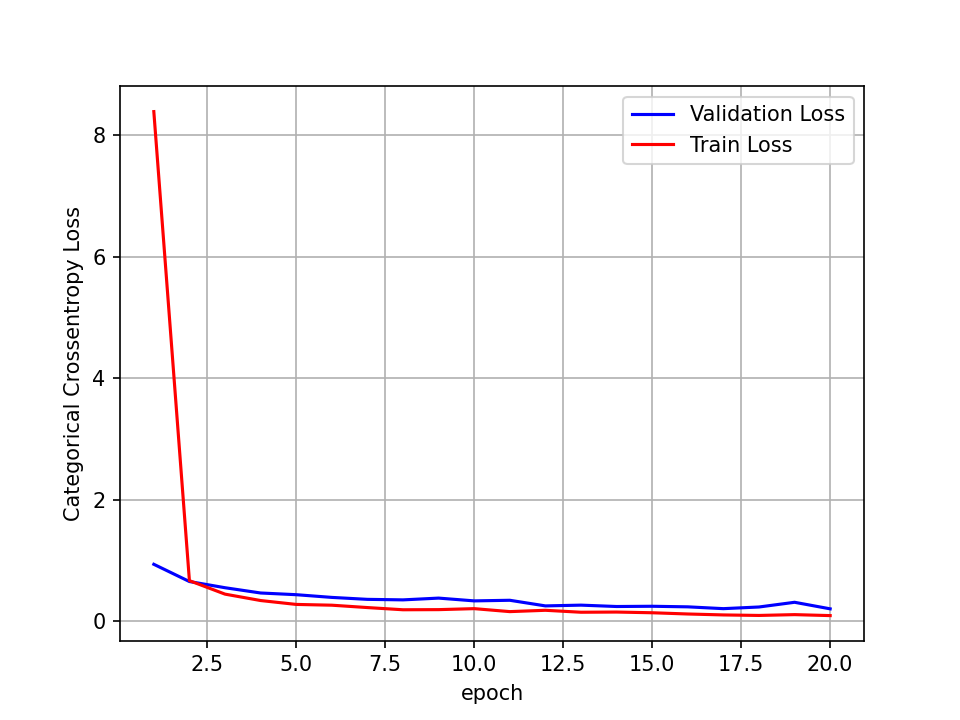

In [20]:
score = model_relu.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<IPython.core.display.Javascript object>


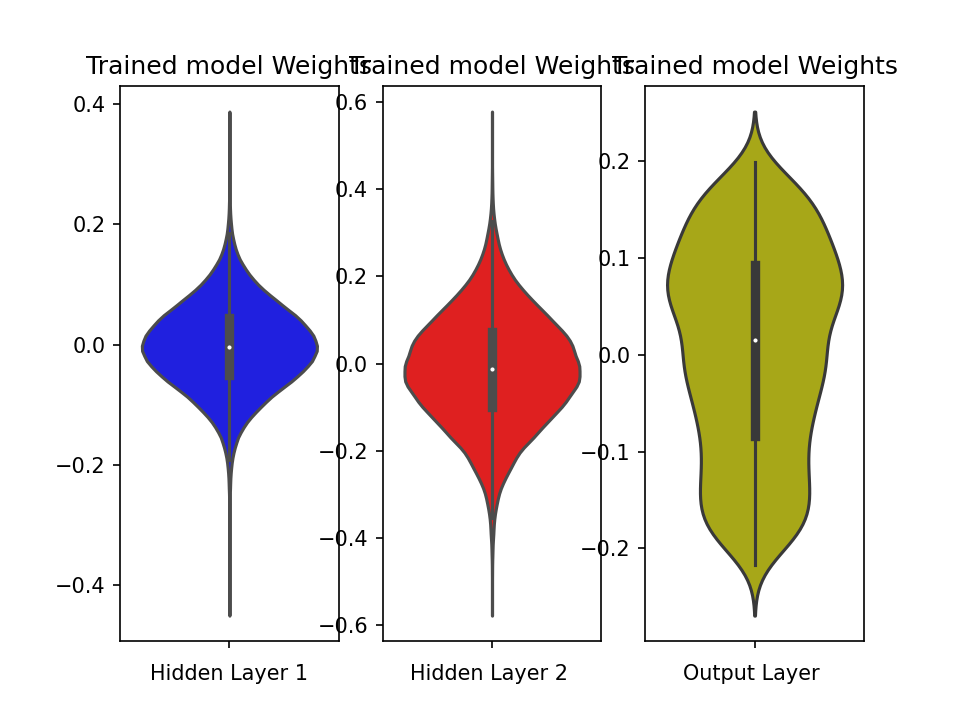

In [21]:
w_after = model_relu.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<h2> MLP + Batch-Norm on hidden Layers + AdamOptimizer </2>

In [23]:
from tensorflow.keras.layers import BatchNormalization

model_batch = Sequential()

model_batch.add(Dense(512, activation='sigmoid', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
model_batch.add(BatchNormalization())

model_batch.add(Dense(128, activation='sigmoid', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model_batch.add(BatchNormalization())

model_batch.add(Dense(output_dim, activation='softmax'))


model_batch.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 512)               401920    
                                                                 
 batch_normalization (BatchN  (None, 512)              2048      
 ormalization)                                                   
                                                                 
 dense_11 (Dense)            (None, 128)               65664     
                                                                 
 batch_normalization_1 (Batc  (None, 128)              512       
 hNormalization)                                                 
                                                                 
 dense_12 (Dense)            (None, 10)                1290      
                                                                 
Total params: 471,434
Trainable params: 470,154
Non-tr

In [24]:
model_batch.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_batch.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_cv, Y_cv))

Epoch 1/20
375/375 [==============================] - 5s 11ms/step - loss: 0.5919 - accuracy: 0.8138 - val_loss: 0.4882 - val_accuracy: 0.8436
Epoch 2/20
375/375 [==============================] - 4s 10ms/step - loss: 0.3831 - accuracy: 0.8796 - val_loss: 0.4502 - val_accuracy: 0.8547
Epoch 3/20
375/375 [==============================] - 4s 10ms/step - loss: 0.3438 - accuracy: 0.8927 - val_loss: 0.3834 - val_accuracy: 0.8783
Epoch 4/20
375/375 [==============================] - 3s 9ms/step - loss: 0.3297 - accuracy: 0.8963 - val_loss: 0.3932 - val_accuracy: 0.8786
Epoch 5/20
375/375 [==============================] - 3s 9ms/step - loss: 0.3051 - accuracy: 0.9046 - val_loss: 0.4091 - val_accuracy: 0.8717
Epoch 6/20
375/375 [==============================] - 3s 9ms/step - loss: 0.3011 - accuracy: 0.9058 - val_loss: 0.3189 - val_accuracy: 0.9001
Epoch 7/20
375/375 [==============================] - 3s 9ms/step - loss: 0.2779 - accuracy: 0.9128 - val_loss: 0.3061 - val_accuracy: 0.9062
Epo

Test score: 0.24236872792243958
Test accuracy: 0.9264000058174133


<IPython.core.display.Javascript object>


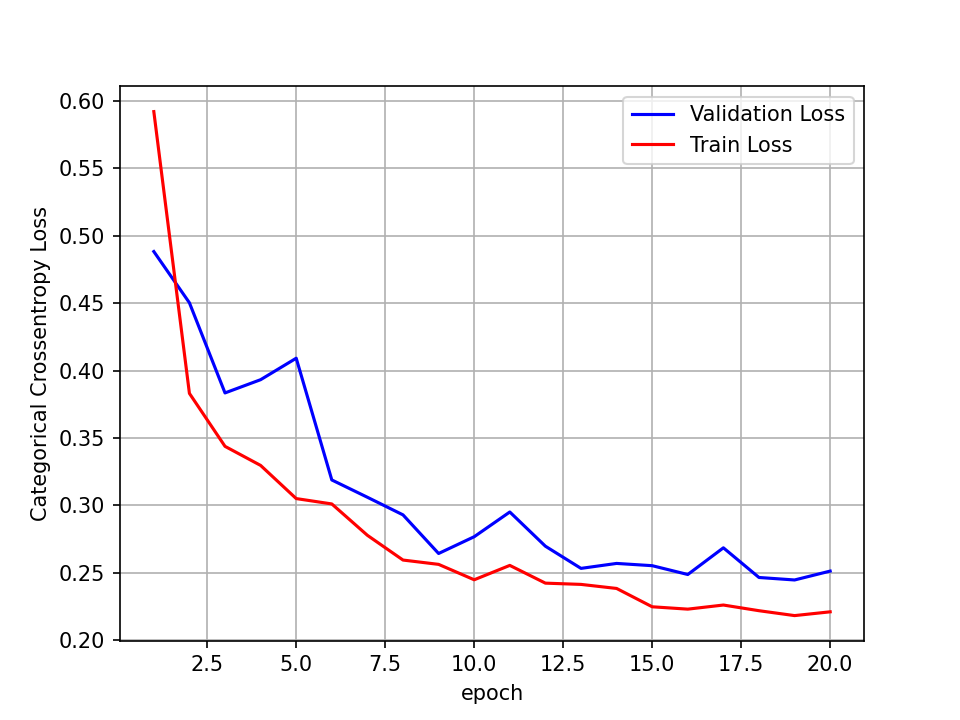

In [25]:
score = model_batch.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<IPython.core.display.Javascript object>


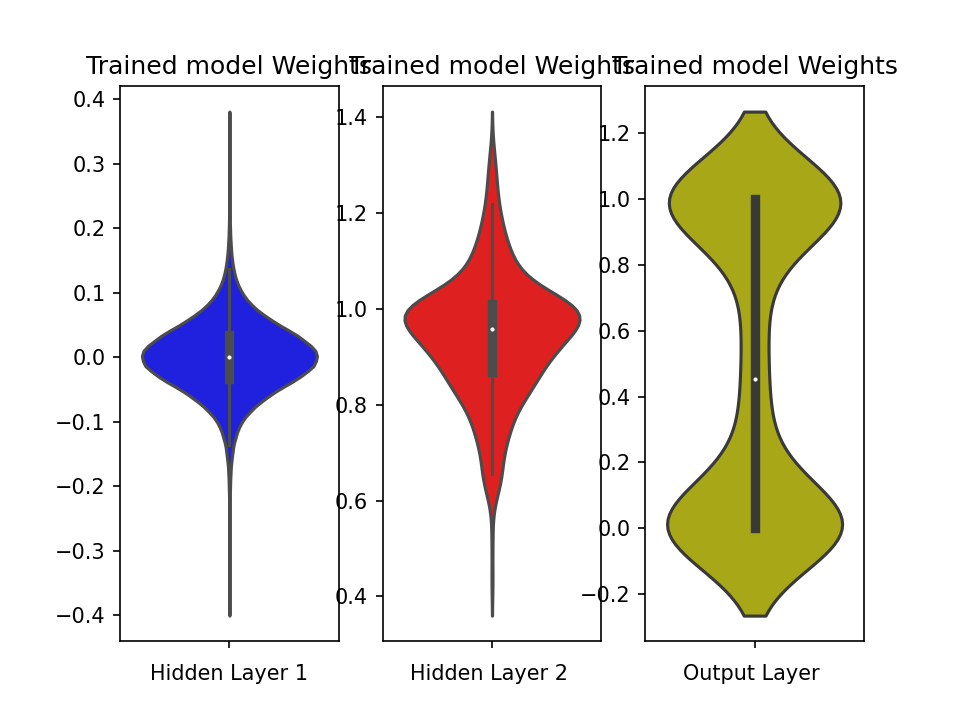

In [26]:
w_after = model_batch.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<h2> 5. MLP + Dropout + AdamOptimizer </h2>

In [27]:
# https://stackoverflow.com/questions/34716454/where-do-i-call-the-batchnormalization-function-in-keras

from tensorflow.keras.layers import Dropout

model_drop = Sequential()

model_drop.add(Dense(512, activation='sigmoid', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(128, activation='sigmoid', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(output_dim, activation='softmax'))


model_drop.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 512)               401920    
                                                                 
 batch_normalization_2 (Batc  (None, 512)              2048      
 hNormalization)                                                 
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_14 (Dense)            (None, 128)               65664     
                                                                 
 batch_normalization_3 (Batc  (None, 128)              512       
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 128)              

In [28]:
model_drop.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_cv, Y_cv))

Epoch 1/20
375/375 [==============================] - 5s 11ms/step - loss: 1.4278 - accuracy: 0.5402 - val_loss: 0.6018 - val_accuracy: 0.8123
Epoch 2/20
375/375 [==============================] - 4s 10ms/step - loss: 0.8146 - accuracy: 0.7299 - val_loss: 0.5065 - val_accuracy: 0.8372
Epoch 3/20
375/375 [==============================] - 4s 10ms/step - loss: 0.7177 - accuracy: 0.7637 - val_loss: 0.4281 - val_accuracy: 0.8692
Epoch 4/20
375/375 [==============================] - 3s 9ms/step - loss: 0.6716 - accuracy: 0.7827 - val_loss: 0.4141 - val_accuracy: 0.8698
Epoch 5/20
375/375 [==============================] - 3s 9ms/step - loss: 0.6275 - accuracy: 0.7980 - val_loss: 0.3791 - val_accuracy: 0.8847
Epoch 6/20
375/375 [==============================] - 3s 9ms/step - loss: 0.5976 - accuracy: 0.8108 - val_loss: 0.3523 - val_accuracy: 0.8928
Epoch 7/20
375/375 [==============================] - 3s 9ms/step - loss: 0.5905 - accuracy: 0.8122 - val_loss: 0.3574 - val_accuracy: 0.8914
Epo

Test score: 0.25738513469696045
Test accuracy: 0.9236999750137329


<IPython.core.display.Javascript object>


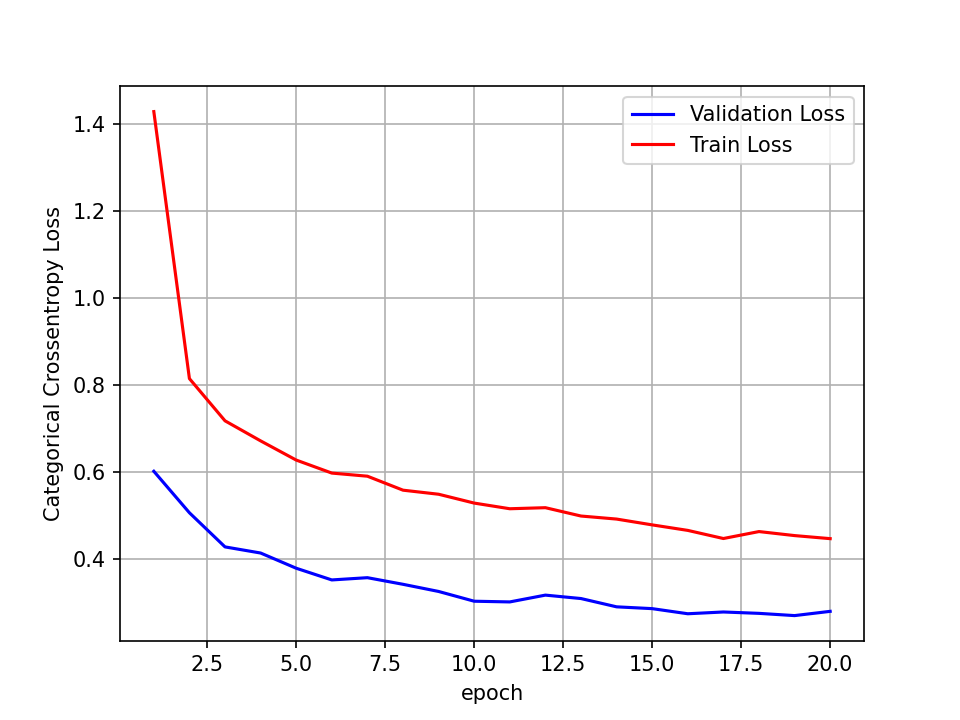

In [29]:
score = model_drop.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<IPython.core.display.Javascript object>


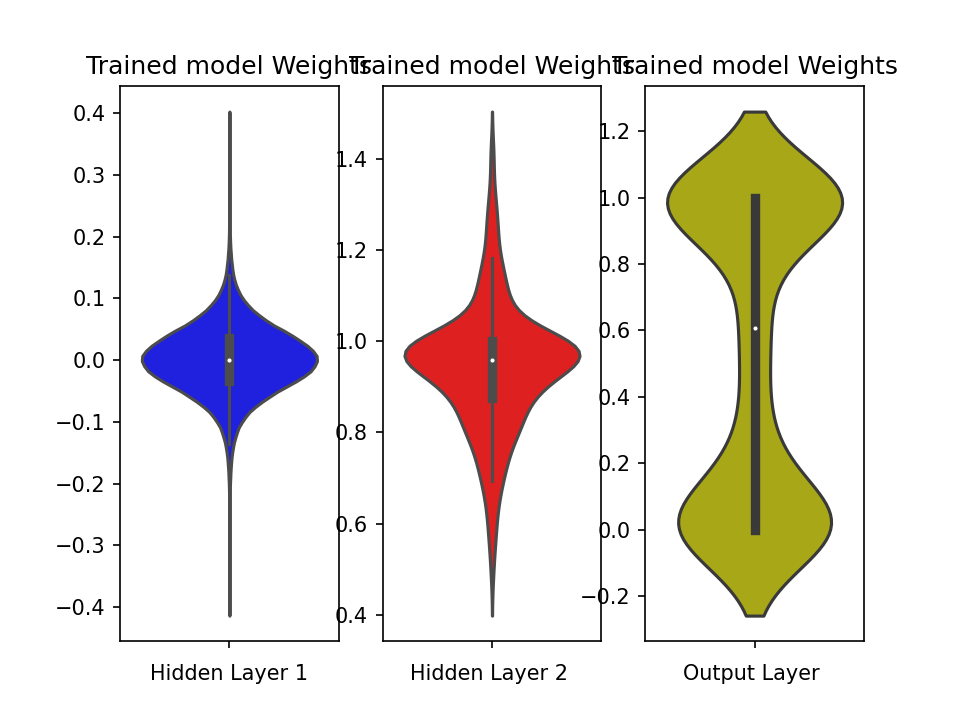

In [30]:
w_after = model_drop.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<h2> Hyper-parameter tuning of Keras models using Sklearn </h2>

In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Embedding, Flatten, LeakyReLU, BatchNormalization, Dropout
from tensorflow.keras.activations import relu,sigmoid

In [68]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

In [85]:
# few hyper params
# 1) # of layers
# 2) # of act units in each layer
# 3) Relu or sigmoid
# 4) Dropout rate

# here we are tuning only the type of activation units by collaborating the idea of sklearn's gridsearch/rand search with keras.

from tensorflow.keras.optimizers import Adam,RMSprop,SGD
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Embedding, Flatten, LeakyReLU, BatchNormalization, Dropout

def best_hyperparameters(layers,activation):

    model = Sequential()
    #model.add(Dense(512, activation=activ, input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
    #model.add(Dense(128, activation=activ, kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
    for i,nodes in enumerate(layers):
        if i==0:
            model.add(Dense(nodes,input_dim=input_dim))
            model.add(Activation(activation))
        else: 
            model.add(Dense(nodes))
            model.add(Activation(activation))
    
    model.add(Dense(output_dim, activation='softmax'))

    model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam') 
    # we have compiled the function, i.e ready to execute, which is done below.
    
    return model


In [86]:
# https://machinelearningmastery.com/grid-search-hyperparameters-deep-learning-models-python-keras/
from tensorflow.keras.activations import *
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

layers = [[40,20],[45,30,15]]
activation = ['sigmoid','relu','elu']

from tensorflow.keras.wrappers.scikit_learn import KerasClassifier  # keras has an extra layer or wrapper on top of it
# This layer can communicates with sklearn so that both can work together.

from sklearn.model_selection import GridSearchCV
# Wrapper - if we have a Kera model, it writes a wrapper on top of it to make it understandle to sktlearn. So that we can use gridsearch or random search

model = KerasClassifier(build_fn=best_hyperparameters,epochs=nb_epoch, batch_size=batch_size, verbose=0)
# we are defining  a model as Keras classifier, where the model is defined at best_hyperparameters()

# if we are using CPU
# grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1) ie njobs is using multicore for fast performance
# if you are using GPU dont use the n_jobs parameter

#grid = GridSearchCV(estimator=model, param_grid=param_grid)
param_grid = dict(layers=layers, activation=activation)
grid = GridSearchCV(estimator=model, param_grid = param_grid)


<ipython-input-86-8c40349d633a>:15: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  model = KerasClassifier(build_fn=best_hyperparameters,epochs=nb_epoch, batch_size=batch_size, verbose=0)


In [87]:
grid_result = grid.fit(X_train, Y_train)

In [88]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.963937 using {'activation': 'elu', 'layers': [45, 30, 15]}
0.956333 (0.001297) with: {'activation': 'sigmoid', 'layers': [40, 20]}
0.956437 (0.002774) with: {'activation': 'sigmoid', 'layers': [45, 30, 15]}
0.961521 (0.001458) with: {'activation': 'relu', 'layers': [40, 20]}
0.961333 (0.002988) with: {'activation': 'relu', 'layers': [45, 30, 15]}
0.962937 (0.001034) with: {'activation': 'elu', 'layers': [40, 20]}
0.963937 (0.001095) with: {'activation': 'elu', 'layers': [45, 30, 15]}


### hyperas and hyperapt are other latest hyper parameter tuning tool boxes like sktlearn.